In [2]:
import pandas as pd
import numpy as np

In [3]:
cus = pd.read_csv('/Users/raphaelseo/Documents/study/fastcampus/바이트디그리/마케팅/class01/data/Customer.csv')
trans = pd.read_csv('/Users/raphaelseo/Documents/study/fastcampus/바이트디그리/마케팅/class01/data/Transactions.csv')

## 데이터 설명
Customer.csv : 고객의 인적 정보를 담고 있는 데이터 (고객id, 생년월일, 성별, 거주지 코드)
-  customer_id : 고객id (고객 식별 값, 보통 고유함)
-   DOB : 고객 생년월일 (날짜 형식 데이터)
-   Gender : 고객 성별 (M : 남성 / F : 여성)
-   city_code : 거주지 코드 (1부터 10까지 숫자로 구성)

Transactions.csv : 거래 내역 데이터 (고객id, 주문id, 거래 일자, 카테고리 콛, 거래 금액 등)
-   transaction_id : 거래id (거래 발생 시 부여되는 번호)
-   cust_id : 고객id (Customer의 customer_id와 동일)
-   tran_date : 거래 일자 (날짜 형식 데이터)
-   prod_sub_cat_code : 서브 카테고리 코드 (숫자 구성)
-   prod_cat_code : 대 카테고리 코드 (숫자 구성)
-   Qty : 주문 수량 (음수로 기록된 데이터도 존재)
-   Rate : 판매 금액 (음수로 기록된 데이터도 존재)
-   Tax : 세금 (음수로 기록된 데이터에도 양수로 기록됨)
-   total_amt : 거래 금액 (판매 금액 x 주문 수량 + 세금)
-   Store_type : 거래가 발생한 판매 채널 타입 (e-shop, TeleShop, Flagship store, MBR)

In [4]:
cus.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [5]:
trans.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


### 각 성별의 연령 분포

In [6]:
date = pd.to_datetime(cus['DOB'], dayfirst=True)

In [7]:
date = pd.DataFrame([x.year for x in date])

In [8]:
date

,0
0,1970
1,1970
2,1970
3,1970
4,1970
...,...
5642,1992
5643,1992
5644,1992
5645,1992


In [9]:
age = (2011 - date)

In [10]:
age_ls = []
for a in age.values:
    if a[0] == 19:
        age_ls.append(15)
    elif a[0] < 25:
        age_ls.append(20)
    elif a[0] < 30:
        age_ls.append(25)
    elif a[0] < 35:
        age_ls.append(30)
    elif a[0] < 40:
        age_ls.append(35)
    else:
        age_ls.append(40)

In [11]:
cus['Age'] = age_ls

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
cus.groupby('Gender')['Age'].value_counts()

Gender  Age
F       20     614
        35     596
        25     592
        30     578
        40     232
        15     141
M       30     662
        20     637
        35     626
        25     606
        40     241
        15     120
Name: count, dtype: int64

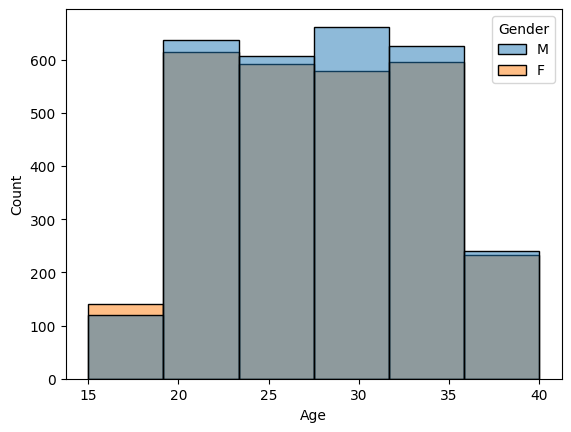

In [14]:
sns.histplot(data=cus, x='Age', hue='Gender', bins=6)
plt.show()

### 각 고객의 구매 경과일수와 구매주기

In [15]:
from datetime import datetime, timedelta

In [16]:
standard = datetime.strptime('2013-02-28', '%Y-%m-%d')

In [17]:
standard

datetime.datetime(2013, 2, 28, 0, 0)

In [18]:
tran_date = [pd.to_datetime(x, dayfirst=True) for x in trans['tran_date']]

In [19]:
trans['tran_date'] = tran_date

In [20]:
trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop


In [21]:
target_trans = trans[trans['tran_date'] <= standard]

In [22]:
target_trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
7366,31384159740,273805,2013-02-28,3,5,2,435,91.350,961.350,e-Shop
7367,55176124310,269273,2013-02-28,4,1,-2,-951,199.710,-2101.710,MBR
7368,17792336273,267832,2013-02-28,1,1,4,523,219.660,2311.660,e-Shop
7369,55783903593,274576,2013-02-28,9,3,2,1342,281.820,2965.820,MBR
7370,60661330238,267233,2013-02-28,4,4,2,1033,216.930,2282.930,e-Shop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop


In [23]:
last_trans = target_trans.groupby('cust_id')['tran_date'].max()
first_trans = target_trans.groupby('cust_id')['tran_date'].min()

In [24]:
last_time = standard - last_trans

In [25]:
last_time

cust_id
266783     8 days
266784    86 days
266785    15 days
266788    16 days
266794    93 days
           ...   
275257     2 days
275261   512 days
275262   365 days
275264   509 days
275265   430 days
Name: tran_date, Length: 5189, dtype: timedelta64[ns]

In [26]:
term = last_trans - first_trans - timedelta(days=1)

In [27]:
term

cust_id
266783   515 days
266784   102 days
266785   700 days
266788   610 days
266794   619 days
           ...   
275257   448 days
275261     8 days
275262   199 days
275264    63 days
275265     8 days
Name: tran_date, Length: 5189, dtype: timedelta64[ns]

### 성별과 연령별 구매주기와 구매 경과일수 비교

In [28]:
last_and_term = pd.concat([last_time, term], axis=1)

In [29]:
last_and_term.columns = ['last_time', 'term']

In [30]:
merge_df = pd.merge(target_trans, cus, left_on='cust_id', right_on='customer_Id', how='inner').drop('customer_Id', axis=1)

In [31]:
merge_df = pd.merge(merge_df, last_and_term, on='cust_id', how='inner')

In [32]:
merge_df

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,Age,last_time,term
0,31384159740,273805,2013-02-28,3,5,2,435,91.350,961.350,e-Shop,16-08-1975,M,10.0,35,0 days,630 days
1,55176124310,269273,2013-02-28,4,1,-2,-951,199.710,-2101.710,MBR,13-03-1986,F,7.0,25,0 days,131 days
2,17792336273,267832,2013-02-28,1,1,4,523,219.660,2311.660,e-Shop,04-10-1979,M,9.0,30,0 days,532 days
3,55783903593,274576,2013-02-28,9,3,2,1342,281.820,2965.820,MBR,25-09-1987,M,6.0,20,0 days,143 days
4,60661330238,267233,2013-02-28,4,4,2,1033,216.930,2282.930,e-Shop,21-08-1987,F,10.0,20,0 days,647 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15682,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,21-02-1972,M,7.0,35,54 days,710 days
15683,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,27-04-1984,M,9.0,25,89 days,675 days
15684,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,20-06-1976,M,8.0,35,530 days,234 days
15685,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,22-05-1970,M,2.0,40,236 days,528 days


In [33]:
merge_df.groupby(['Gender', 'Age'])['last_time'].mean()

Gender  Age
F       15    184 days 03:14:07.058823530
        20    200 days 19:36:21.752265862
        25    196 days 14:00:22.542266750
        30    189 days 19:29:23.401109058
        35    194 days 16:08:55.502614758
        40    187 days 18:39:45.671641792
M       15    199 days 01:46:59.814241486
        20    180 days 21:16:56.192560176
        25    191 days 03:15:50.819672132
        30    199 days 23:12:07.847411444
        35    194 days 13:08:23.626943006
        40    199 days 16:55:40.438871474
Name: last_time, dtype: timedelta64[ns]

In [34]:
merge_df.groupby(['Gender', 'Age'])['term'].mean()

Gender  Age
F       15    389 days 17:31:45.882352940
        20    362 days 16:26:40.966767372
        25    367 days 18:32:41.177207264
        30    378 days 17:12:45.249537892
        35    386 days 18:22:48.041836140
        40    389 days 03:11:17.014925372
M       15    375 days 15:09:28.421052632
        20    383 days 16:46:44.376367616
        25    371 days 20:51:08.852459016
        30    374 days 06:01:45.940054496
        35    381 days 11:38:01.865284976
        40    376 days 17:40:48.902821316
Name: term, dtype: timedelta64[ns]

### 구매 경과일수가 30일 이상인 고객 대상 재구매 캠페인 결과

In [35]:
over_30 = merge_df[merge_df['last_time'] >= timedelta(days=30)]['cust_id']

In [36]:
over_30

592      271664
593      266824
594      271822
595      268143
596      268304
          ...  
15680    272049
15682    274550
15683    270022
15684    271020
15685    270911
Name: cust_id, Length: 13635, dtype: int64

In [37]:
target_trans = trans[trans['cust_id'].isin(over_30)]

In [38]:
target_trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR


In [39]:
success = target_trans[(target_trans['tran_date'] > standard) & (target_trans['tran_date'] <= datetime.strptime('2013-12-31', '%Y-%m-%d'))]

In [40]:
len(success['cust_id'].unique())

2977

### 요일별 구매 건수 차이

In [41]:
target = trans.copy()
target['dow'] = target['tran_date'].dt.day_name()

In [42]:
target

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,dow
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Friday
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Thursday
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Monday
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Monday
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Tuesday
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Tuesday
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Tuesday
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Tuesday


In [43]:
target.groupby(target['dow']).size()

dow
Friday       3361
Monday       3219
Saturday     3258
Sunday       3326
Thursday     3318
Tuesday      3269
Wednesday    3302
dtype: int64

### 대 카테고리별 월평균 매출액이 가장 높은 카테고리

In [44]:
target = trans[(trans['tran_date'] <= datetime.strptime('2013-12-31', '%Y-%m-%d')) & (trans['tran_date'] >= datetime.strptime('2011-01-01', '%Y-%m-%d'))]

In [45]:
target

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
1065,58387181112,275068,2013-12-31,8,3,5,792,415.800,4375.800,e-Shop
1066,21300411973,274568,2013-12-31,2,6,1,1054,110.670,1164.670,Flagship store
1067,25511948871,273541,2013-12-31,3,1,-3,-253,79.695,-838.695,MBR
1068,45524941068,268722,2013-12-31,10,5,5,124,65.100,685.100,Flagship store
1069,26100869804,273836,2013-12-31,9,3,3,843,265.545,2794.545,e-Shop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop


In [46]:
pd.options.mode.chained_assignment = None

In [47]:
target['year'] = target['tran_date'].dt.year
target['month'] = target['tran_date'].dt.month

In [48]:
target

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,year,month
1065,58387181112,275068,2013-12-31,8,3,5,792,415.800,4375.800,e-Shop,2013,12
1066,21300411973,274568,2013-12-31,2,6,1,1054,110.670,1164.670,Flagship store,2013,12
1067,25511948871,273541,2013-12-31,3,1,-3,-253,79.695,-838.695,MBR,2013,12
1068,45524941068,268722,2013-12-31,10,5,5,124,65.100,685.100,Flagship store,2013,12
1069,26100869804,273836,2013-12-31,9,3,3,843,265.545,2794.545,e-Shop,2013,12
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,2011,1
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,2011,1
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,2011,1
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,2011,1


In [49]:
monthly_sales = target.groupby(['year', 'month', 'prod_cat_code'])['total_amt'].sum().reset_index()

In [50]:
monthly_sales

,year,month,prod_cat_code,total_amt
0,2011,1,1,31618.470
1,2011,1,2,21522.085
2,2011,1,3,69149.795
3,2011,1,4,28925.585
4,2011,1,5,111702.240
...,...,...,...,...
211,2013,12,2,169232.960
212,2013,12,3,261729.195
213,2013,12,4,94656.510
214,2013,12,5,323587.095


In [51]:
monthly_avg_sales = monthly_sales.groupby('prod_cat_code')['total_amt'].mean()

In [52]:
monthly_avg_sales

prod_cat_code
1    164999.674306
2    165679.034444
3    284476.325972
4    109006.316250
5    339932.009444
6    223243.549028
Name: total_amt, dtype: float64

In [53]:
monthly_avg_sales.idxmax()

5

### 카테고리별 월평균 매출액 분산과 표준편차

In [54]:
variance = monthly_sales.groupby('prod_cat_code')['total_amt'].apply(lambda x: ((x - x.mean())**2).mean())

In [55]:
variance

prod_cat_code
1    1.583121e+09
2    1.259036e+09
3    2.536464e+09
4    6.620412e+08
5    2.937566e+09
6    1.798540e+09
Name: total_amt, dtype: float64

In [56]:
std_deviation = variance**0.5

In [57]:
std_deviation

prod_cat_code
1    39788.455318
2    35482.891659
3    50363.319032
4    25730.161044
5    54199.319672
6    42409.202795
Name: total_amt, dtype: float64

### 성과 판단

In [58]:
coef = std_deviation/monthly_avg_sales

In [59]:
coef

prod_cat_code
1    0.241143
2    0.214166
3    0.177039
4    0.236043
5    0.159442
6    0.189968
Name: total_amt, dtype: float64

In [60]:
monthly_avg_sales

prod_cat_code
1    164999.674306
2    165679.034444
3    284476.325972
4    109006.316250
5    339932.009444
6    223243.549028
Name: total_amt, dtype: float64

In [61]:
monthly_sales['year_month'] = monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str)

In [62]:
monthly_sales['year_month'] = pd.to_datetime(monthly_sales['year_month'])

In [63]:
cate_1 = monthly_sales[monthly_sales['prod_cat_code']==1]

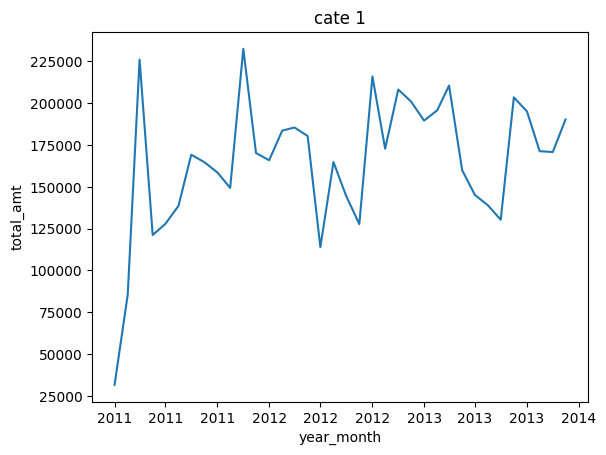

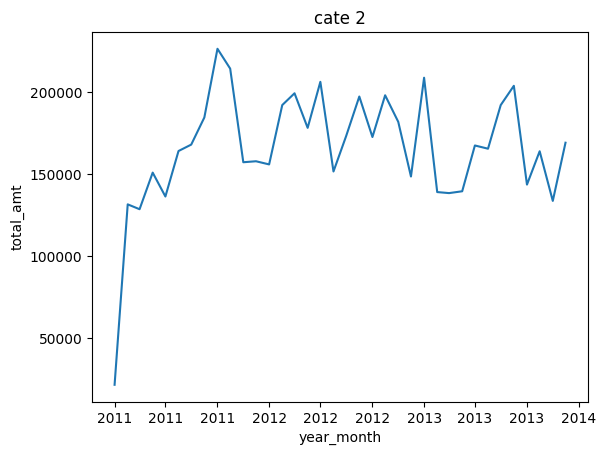

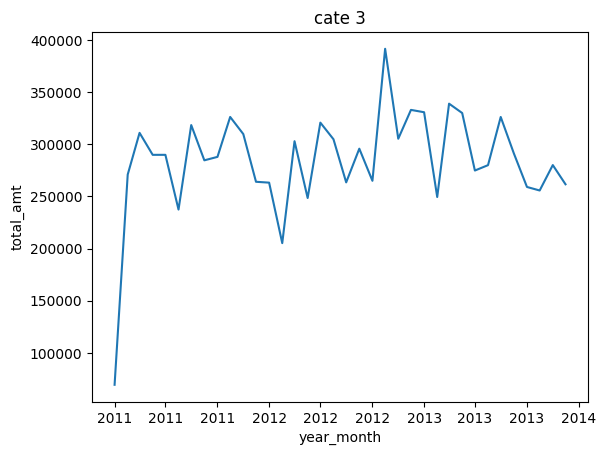

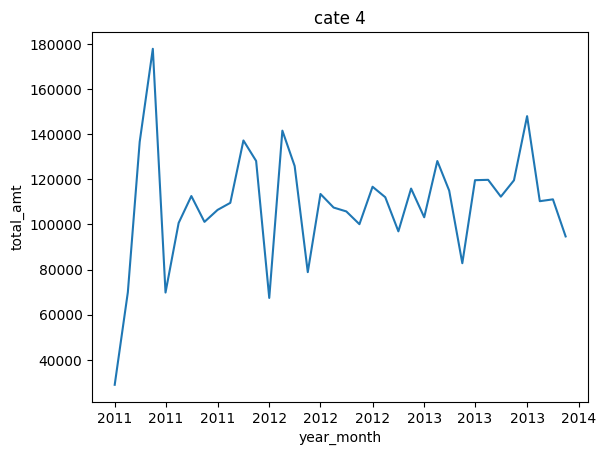

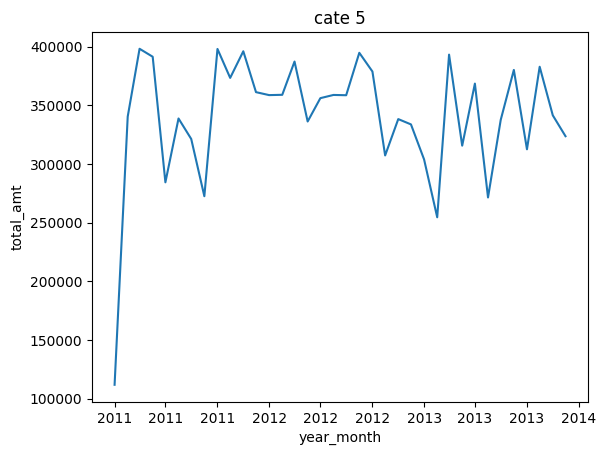

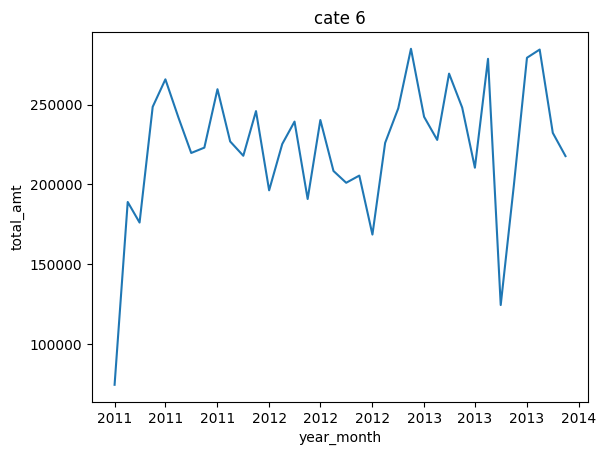

In [64]:
for i in monthly_sales['prod_cat_code'].unique():
    cate = monthly_sales[monthly_sales['prod_cat_code']==i]
    sns.lineplot(data=cate, x='year_month', y='total_amt')
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.AutoDateFormatter(plt.matplotlib.dates.AutoDateLocator()))
    plt.title(f'cate {i}')
    plt.show()

- 5번 카테고리 상품의 경우 월별 평균 매출액도 가장 높았고 변동계수도 가장 낮았습니다. 그러므로 꾸준히 안정적으로 높은 매출을 보여주고 있다고 판단됩니다.
- 반면 1번 카테고리 상품의 경우 변동계수가 가장 컸는데 카테고리 중 가장 큰 계절성을 갖는 상품으로 판단됩니다.
- 4번 카테고리의 경우 월평균 매출액도 낮고 변동계수도 2번쨰로 컸습니다. 그러므로 4번 상품은 유행성 상품으로 판단됩니다.

## 매출 관점에서 카테고리별 매출 성장 방안

In [65]:
trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop


### 가설 1 상품 카테고리별로 잘 팔리는 판매처가 다를 것이다

In [66]:
store_sales = target.groupby(['year', 'month', 'Store_type', 'prod_cat_code'])['total_amt'].sum().reset_index()

In [67]:
store_sales['year_month'] = store_sales['year'].astype(str) + '-' + store_sales['month'].astype(str)
store_sales['year_month'] = pd.to_datetime(store_sales['year_month'])

In [68]:
store_sales

,year,month,Store_type,prod_cat_code,total_amt,year_month
0,2011,1,Flagship store,1,9977.045,2011-01-01
1,2011,1,Flagship store,2,4952.610,2011-01-01
2,2011,1,Flagship store,3,10320.700,2011-01-01
3,2011,1,Flagship store,4,7504.055,2011-01-01
4,2011,1,Flagship store,5,23650.315,2011-01-01
...,...,...,...,...,...,...
859,2013,12,e-Shop,2,86080.605,2013-12-01
860,2013,12,e-Shop,3,80550.080,2013-12-01
861,2013,12,e-Shop,4,35688.185,2013-12-01
862,2013,12,e-Shop,5,102405.875,2013-12-01


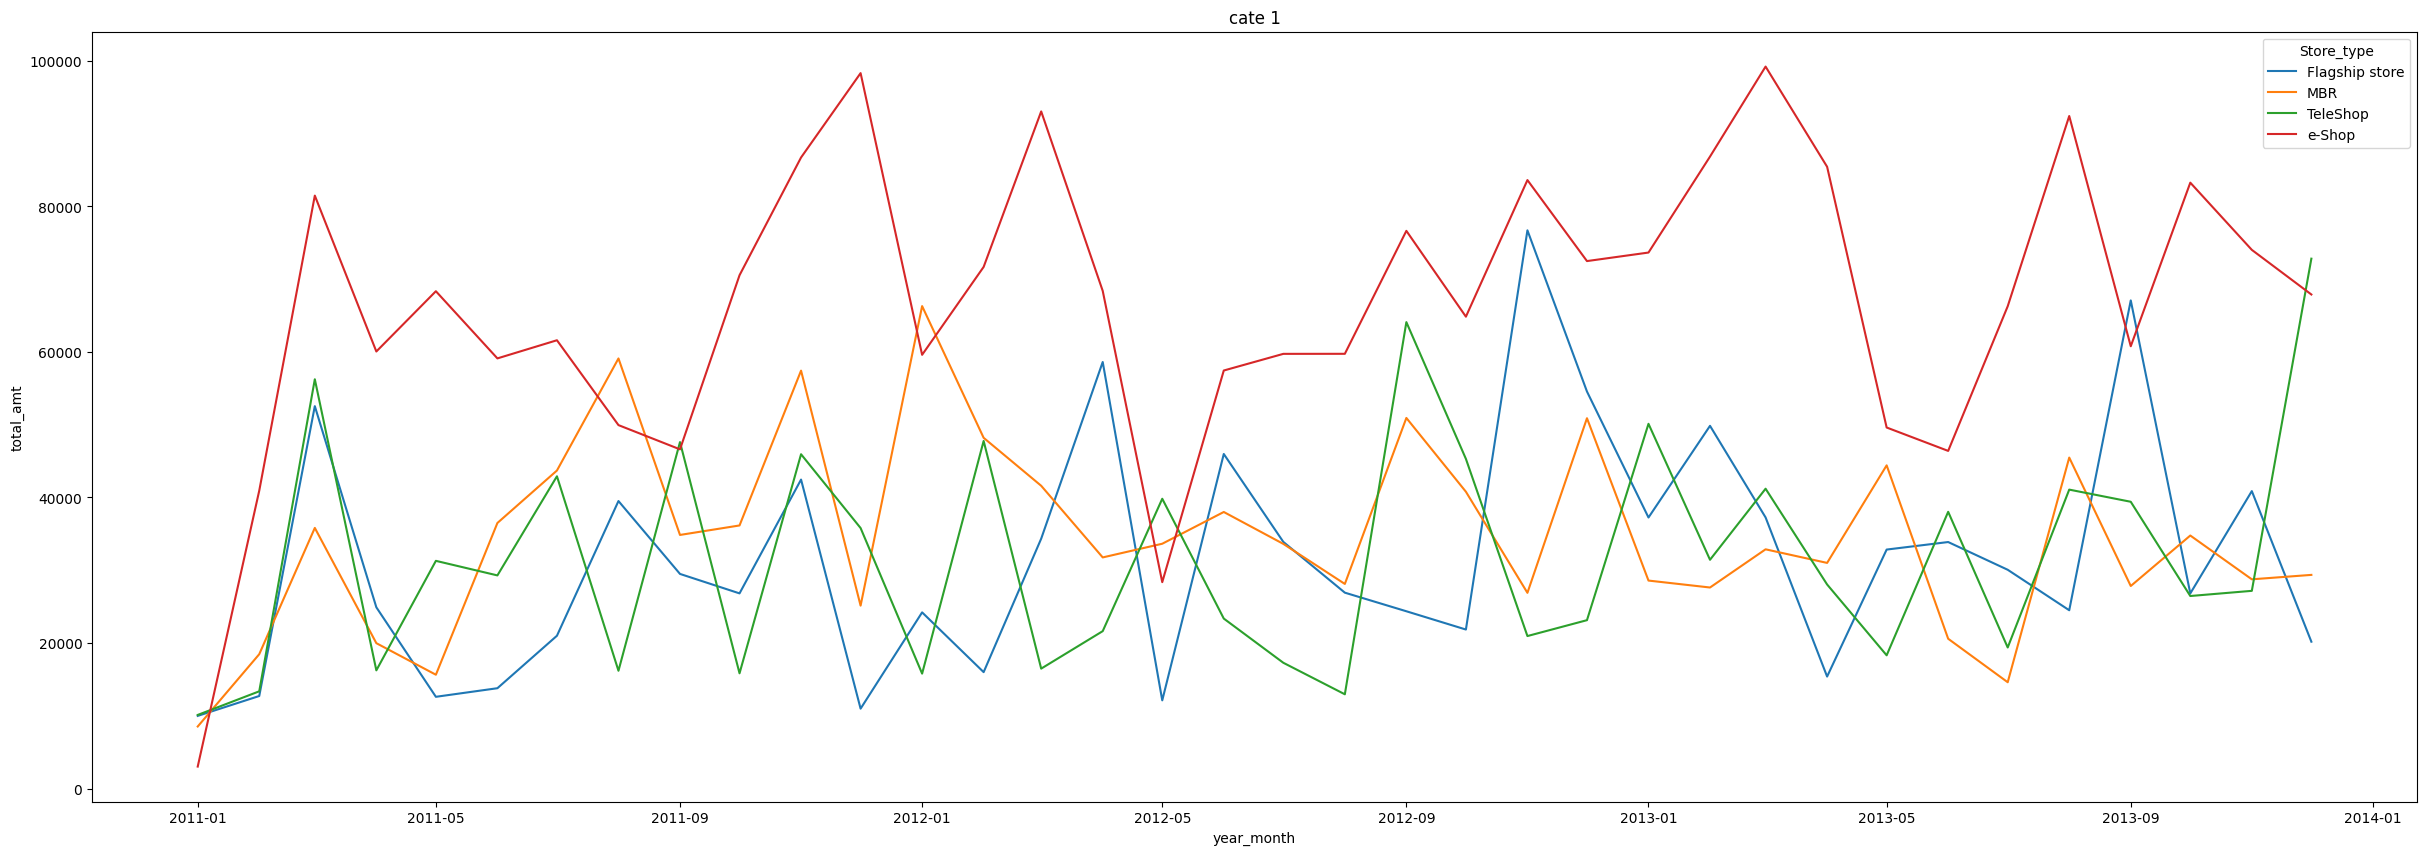

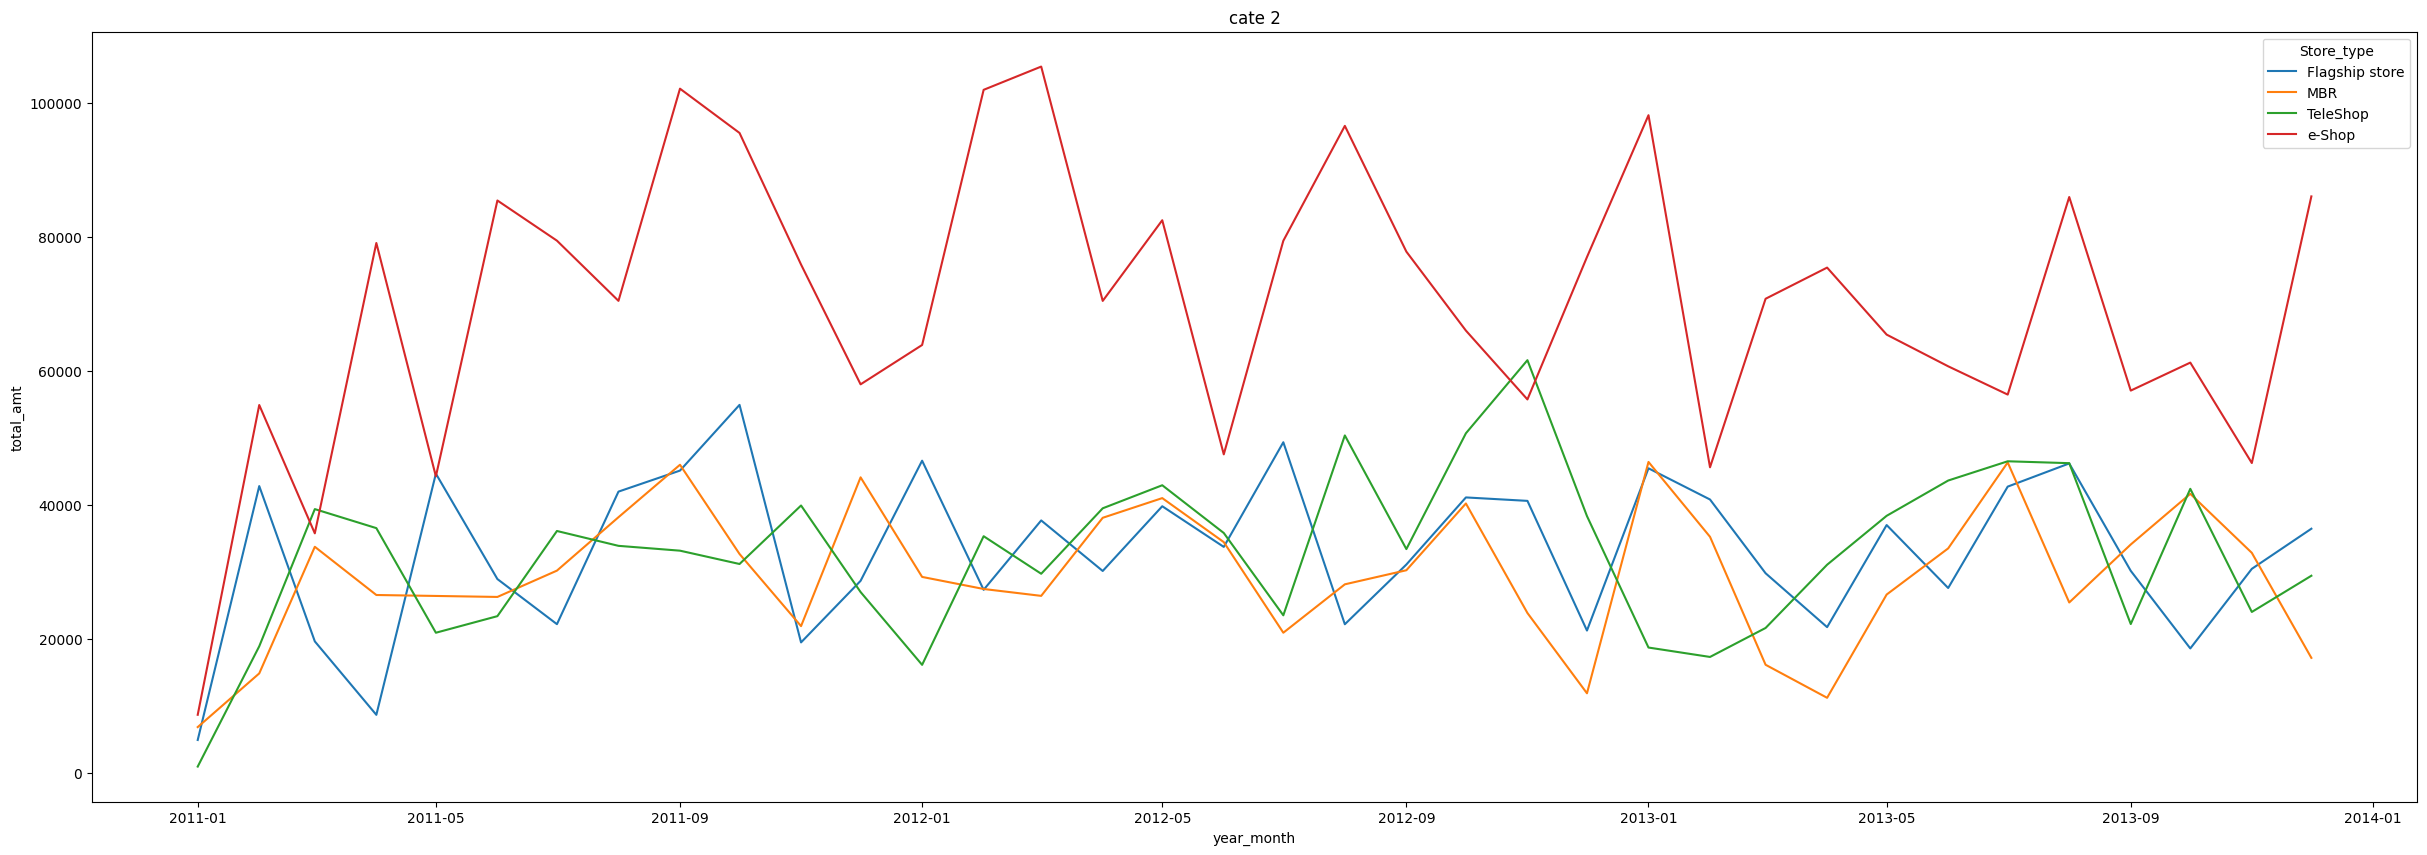

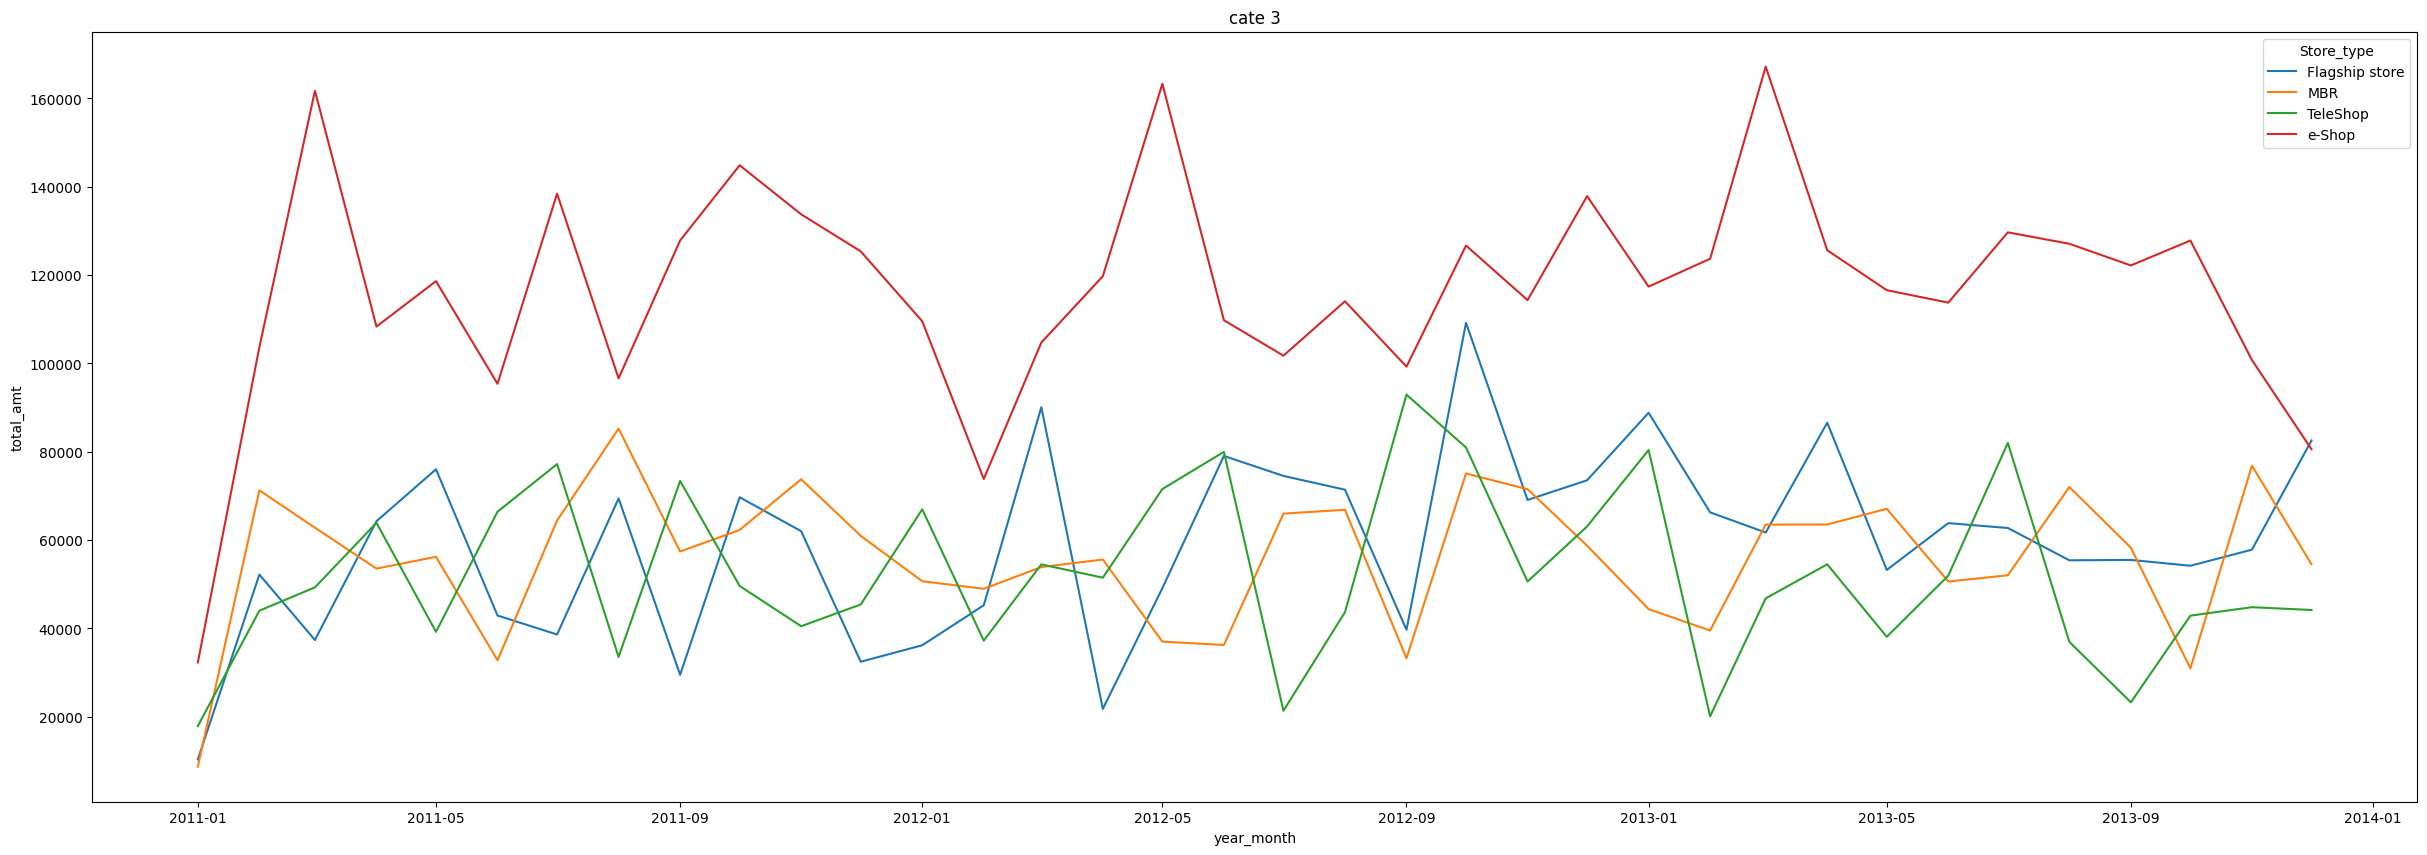

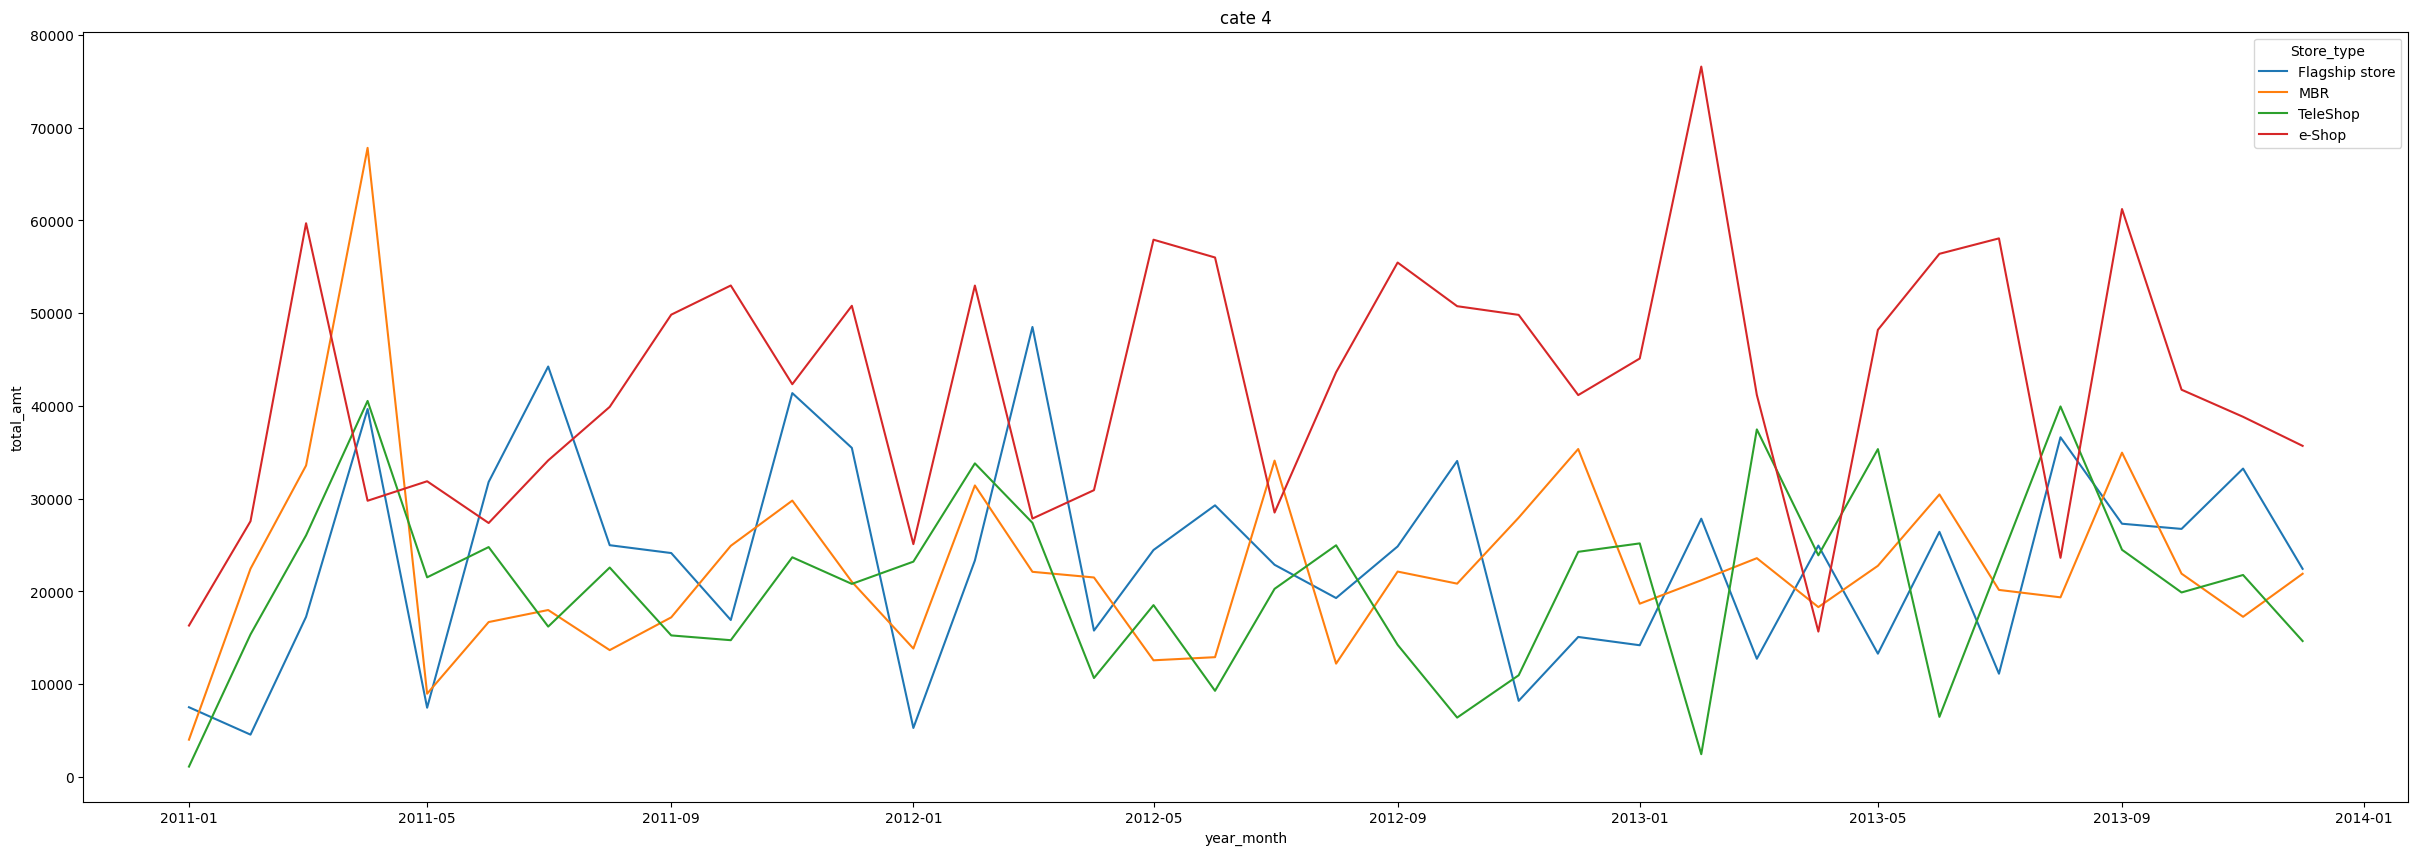

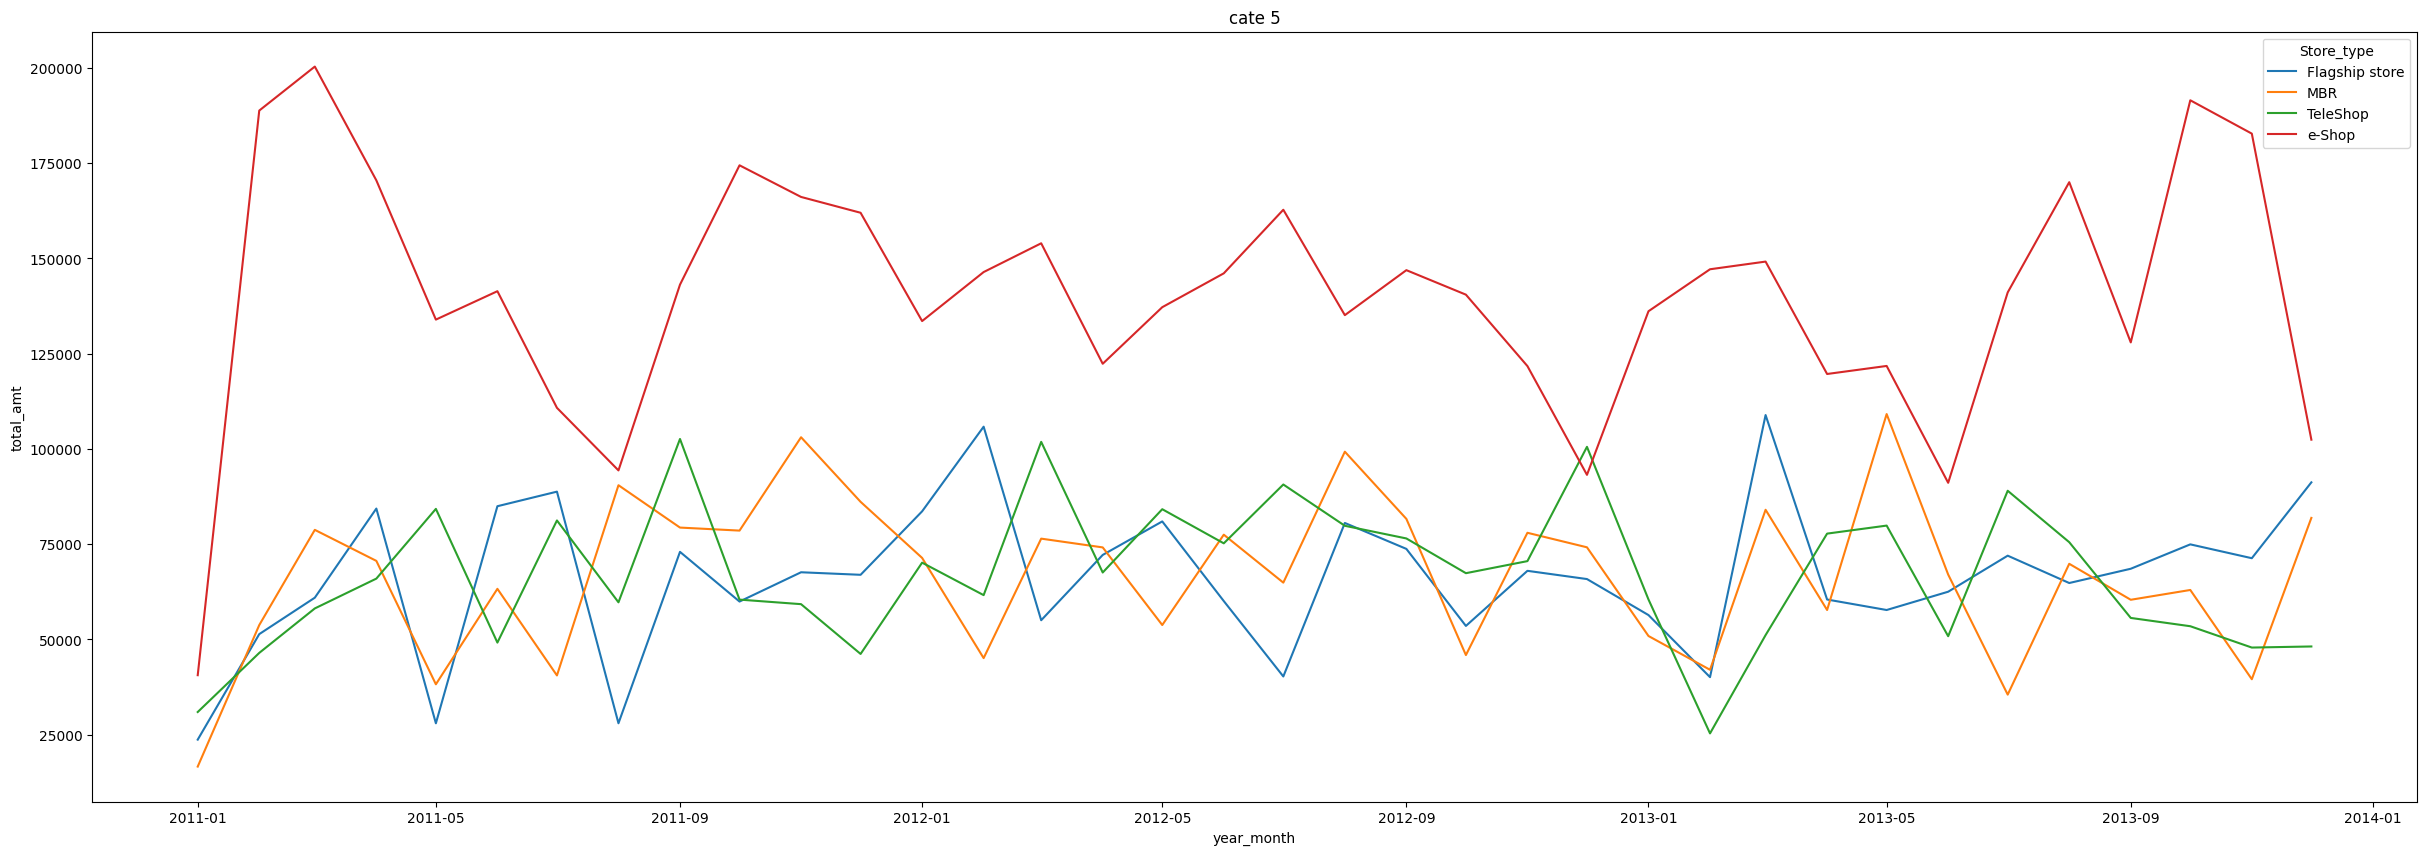

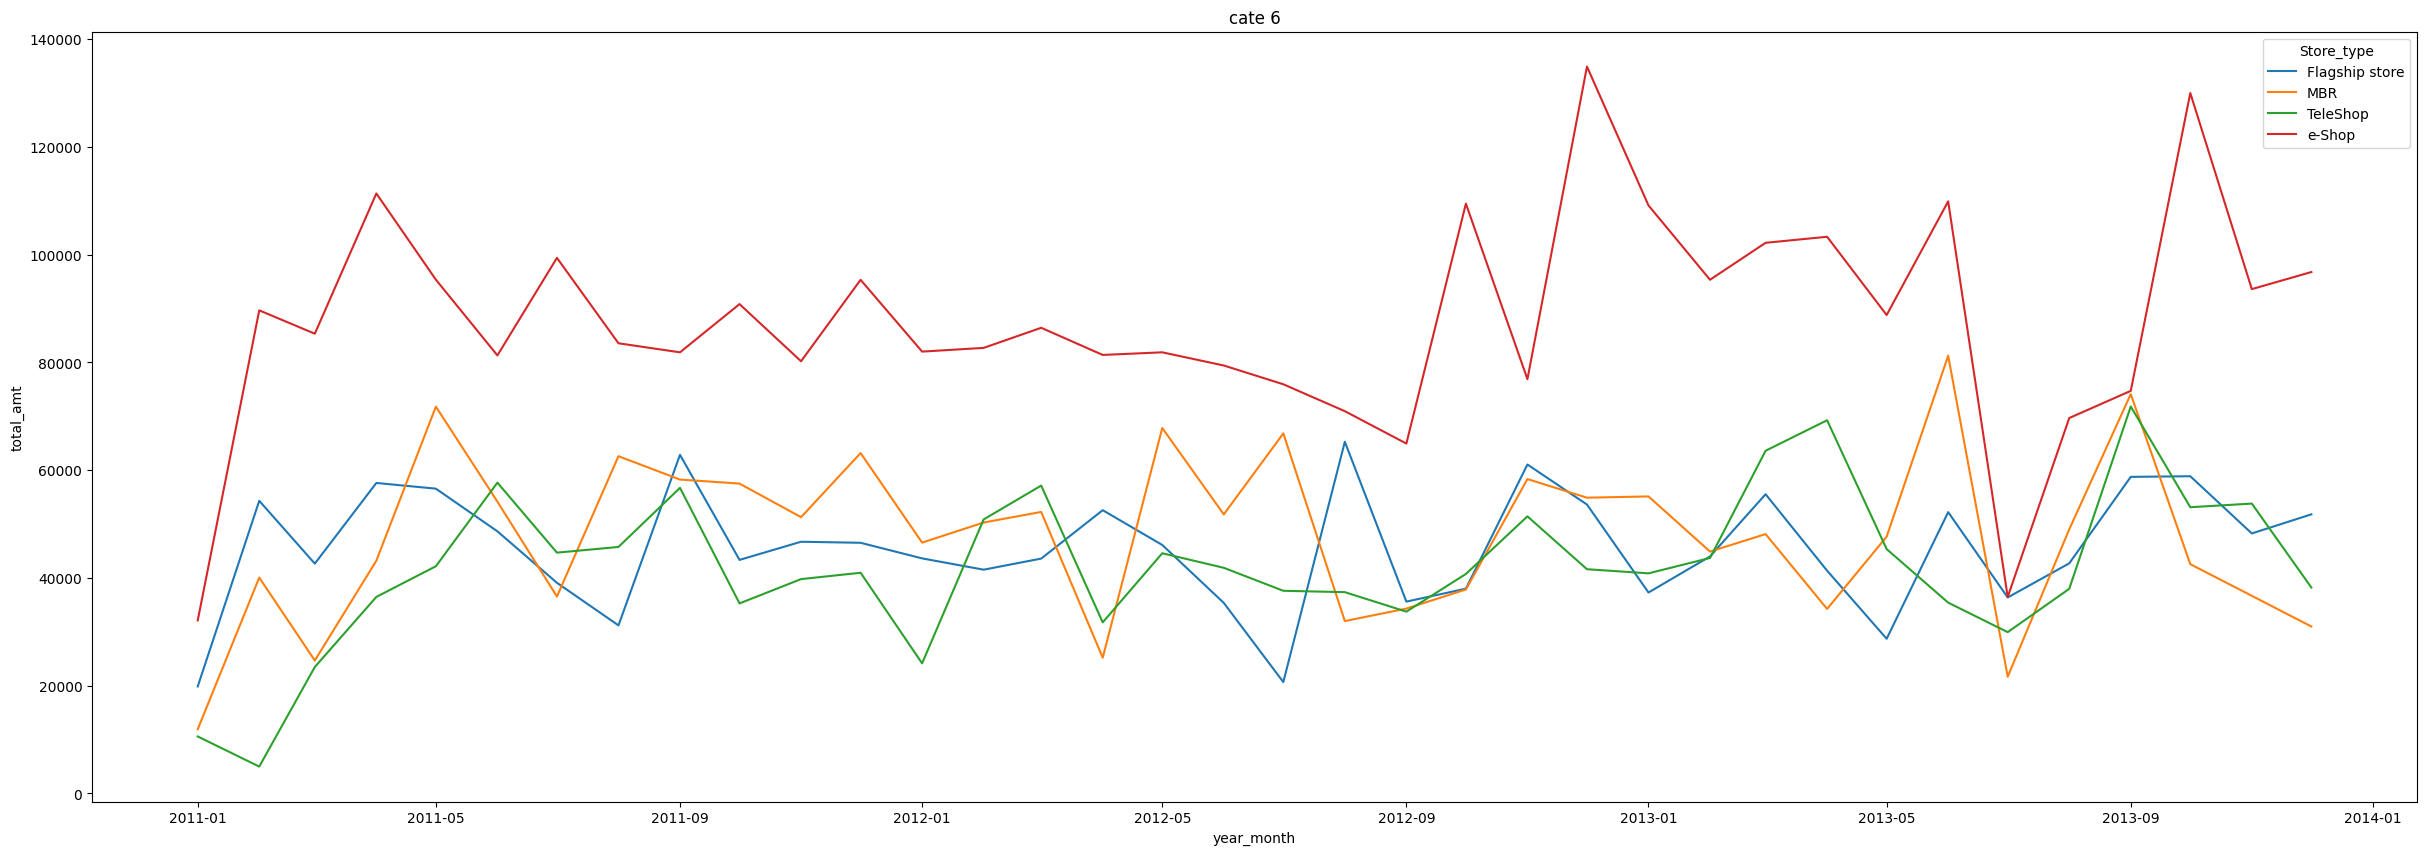

In [79]:
for i in store_sales['prod_cat_code'].unique():
    target = store_sales[store_sales['prod_cat_code']==i]
    plt.figure(figsize=(30,10))
    sns.lineplot(data=target, x='year_month', y='total_amt', hue='Store_type')
    plt.title(f'cate {i}')
    plt.show()

#### 시각화 결과
- 대부분의 카테고리들이 e-shop에서의 매출액이 가장 높았습니다.

- 1번 카테고리
  - 1번 카테고리 상품들의 경우 가장 최근에 Teleshop에서 e-shop의 매출을 넘는 성장을 하였습니다.
  - 그리고 중간 중간 Flagship store에서의 매출도 e-shop에 비교될만큼 나온 기록이 존재하였습니다.
  - 그러므로 Teleshop과 Flagship store를 중점적으로 판매전략을 수립할 경우 매출이 성장할 것으로 예상됩니다.
- 2번 카테고리
  - 2번 카테고리의 경우 꾸준하게 e-shop의 매출 비중이 높습니다.
  - 그러므로 e-shop에 집중하여 마케팅을 하는 것이 좋을 것이라고 판단됩니다.
- 3번 카테고리
  - 3번 카테고리의 경우 최근 Flagship store의 매출이 e-shop을 넘었습니다.
  - 하지만 꾸준하게 e-shop의 매출이 높았기 때문에 e-shop과 Flagship store를 중점으로 판매 전략을 수립하는 것이 좋을 것으로 판단됩니다.
- 4번 카테고리
  - 4번 카테고리의 경우 다른 카테고리와는 다르게 e-shop의 매출 비율이 비교적 낮았습니다.
  - 그러므로 4번 카테고리의 경우 다른 카테고리에 비해 e-shop에 대한 비중을 좀 줄여도 된다고 판단됩니다.
- 5번 카테고리
  - 5번 카테고리의 경우 꾸준하게 e-shop의 매출 비중이 높습니다.
  - 그러므로 e-shop에 집중하여 판매전략을 수립하는 것이 좋을 것이라고 판단됩니다.
- 6번 카테고리
  - 6번 카테고리의 경우 꾸준하게 e-shop의 매출 비중이 높습니다.
  - 그러므로 e-shop에 집중하여 판매전략을 수립하는 것이 좋을 것이라고 판단됩니다.

### 가설 2 나이와 성별별로 선호하는 카테고리가 다를 것이다.

In [80]:
merge_df

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,Age,last_time,term
0,31384159740,273805,2013-02-28,3,5,2,435,91.350,961.350,e-Shop,16-08-1975,M,10.0,35,0 days,630 days
1,55176124310,269273,2013-02-28,4,1,-2,-951,199.710,-2101.710,MBR,13-03-1986,F,7.0,25,0 days,131 days
2,17792336273,267832,2013-02-28,1,1,4,523,219.660,2311.660,e-Shop,04-10-1979,M,9.0,30,0 days,532 days
3,55783903593,274576,2013-02-28,9,3,2,1342,281.820,2965.820,MBR,25-09-1987,M,6.0,20,0 days,143 days
4,60661330238,267233,2013-02-28,4,4,2,1033,216.930,2282.930,e-Shop,21-08-1987,F,10.0,20,0 days,647 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15682,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,21-02-1972,M,7.0,35,54 days,710 days
15683,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,27-04-1984,M,9.0,25,89 days,675 days
15684,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,20-06-1976,M,8.0,35,530 days,234 days
15685,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,22-05-1970,M,2.0,40,236 days,528 days


In [81]:
age_gender = merge_df.groupby(['Gender', 'Age', 'prod_cat_code'])['total_amt'].sum().reset_index()

In [82]:
age_gender

,Gender,Age,prod_cat_code,total_amt
0,F,15,1,134038.710
1,F,15,2,104756.210
2,F,15,3,172058.445
3,F,15,4,77896.975
4,F,15,5,211296.995
...,...,...,...,...
67,M,40,2,185017.885
68,M,40,3,347663.940
69,M,40,4,91869.700
70,M,40,5,345594.275


In [96]:
age_gender_group = age_gender.groupby(['Age', 'Gender','prod_cat_code'])['total_amt'].sum().reset_index()

In [97]:
age_gender_group

,Age,Gender,prod_cat_code,total_amt
0,15,F,1,134038.710
1,15,F,2,104756.210
2,15,F,3,172058.445
3,15,F,4,77896.975
4,15,F,5,211296.995
...,...,...,...,...
67,40,M,2,185017.885
68,40,M,3,347663.940
69,40,M,4,91869.700
70,40,M,5,345594.275


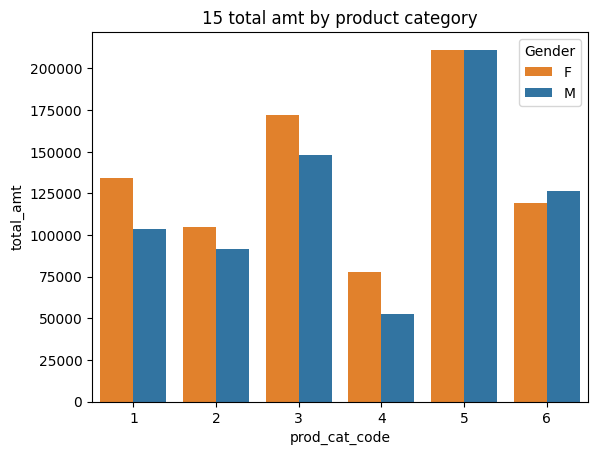

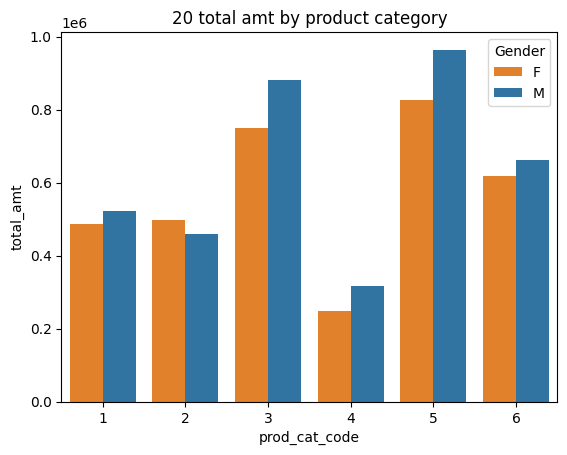

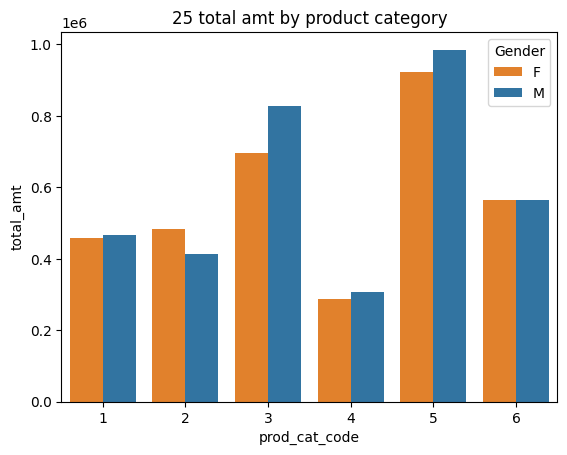

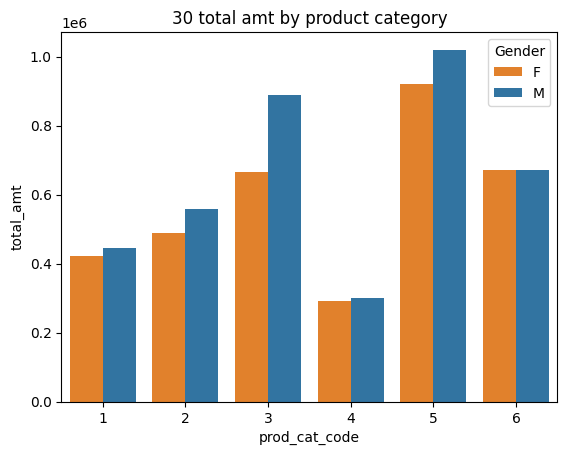

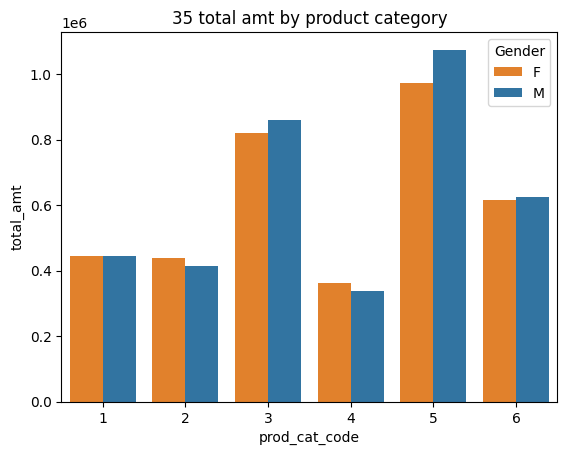

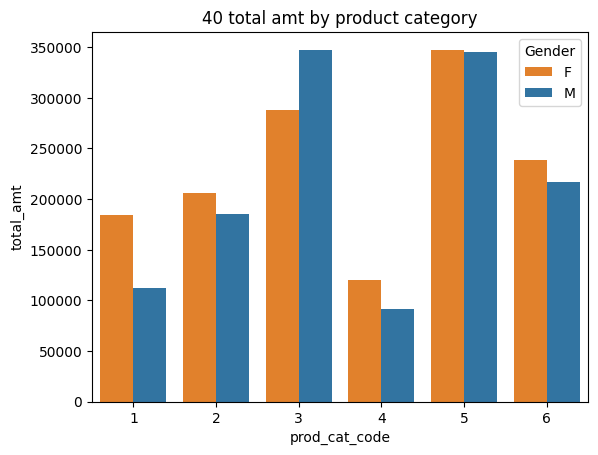

In [177]:
current_palette = sns.color_palette()
palette = sns.color_palette(current_palette, n_colors=len(age_gender_group['Gender'].unique()))[::-1]
for age in list(age_gender_group['Age'].unique()):
    target = age_gender_group[(age_gender_group['Age']==age)]
    sns.barplot(data=target, x='prod_cat_code', y='total_amt', hue='Gender', palette=palette)
    plt.title(f'{age} total amt by product category')
    plt.show()

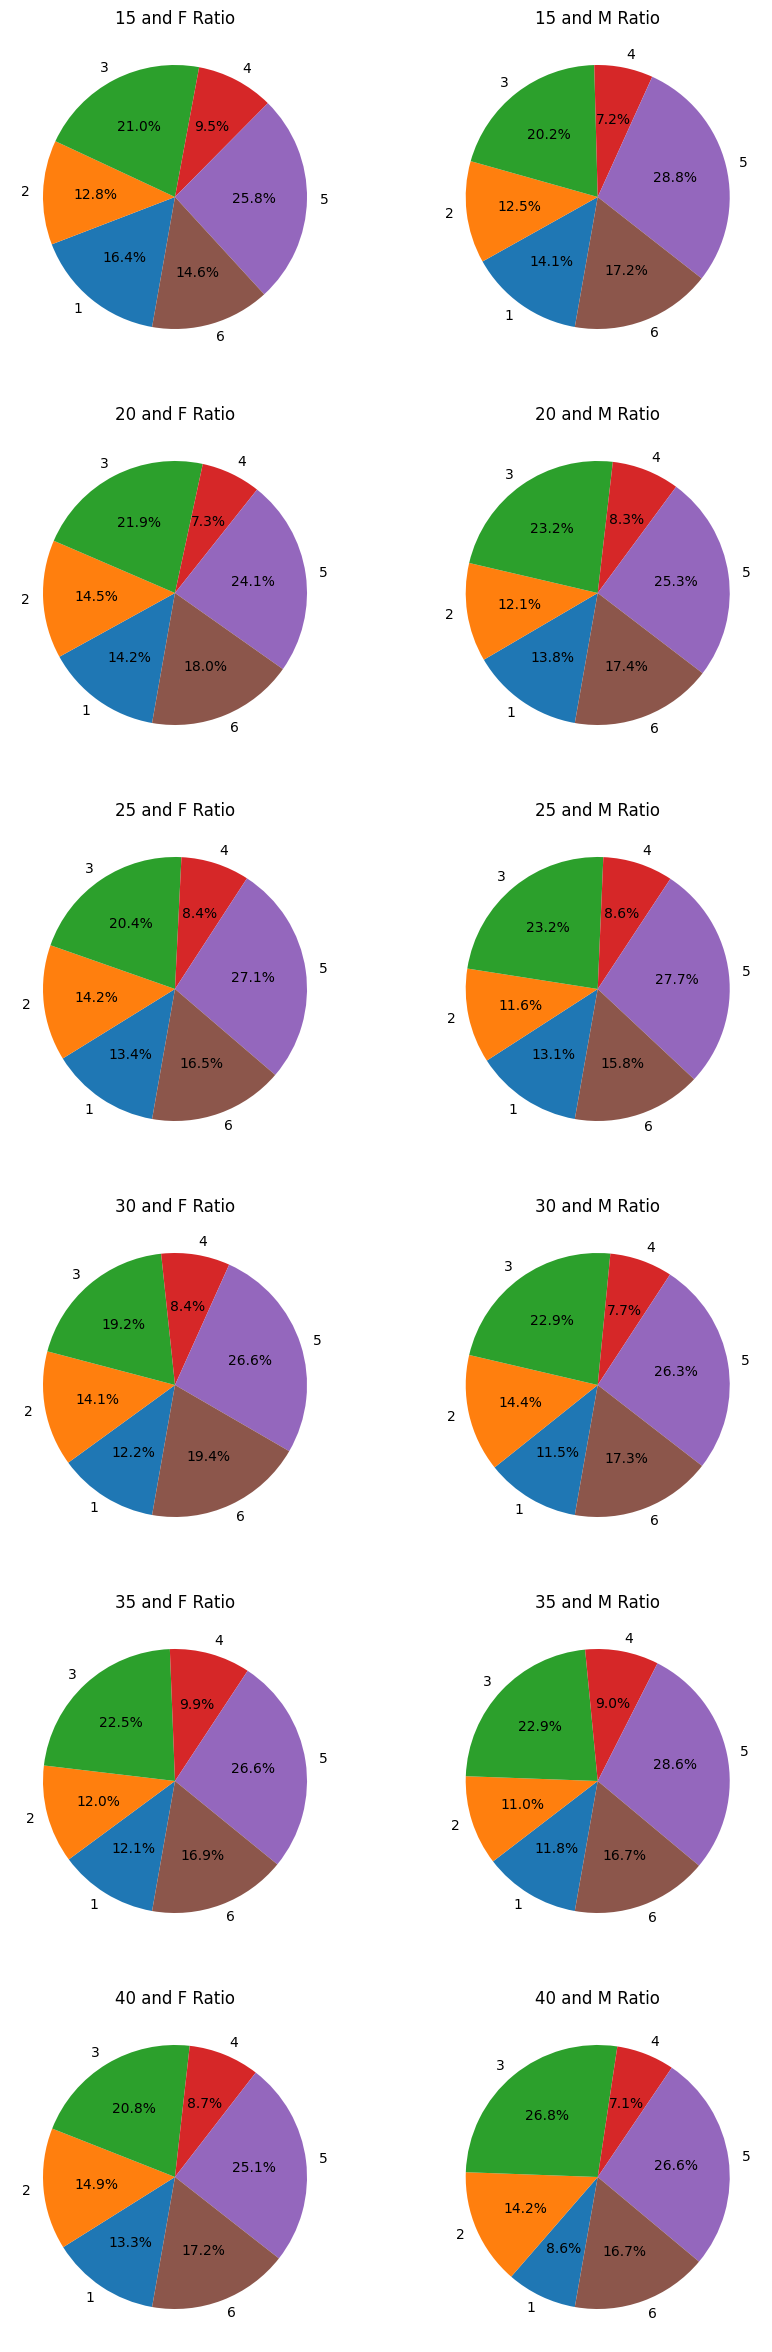

In [162]:
fig, axs = plt.subplots(6, 2, figsize=(10,30))
axs = axs.ravel()
n = 0
for age in age_gender_group['Age'].unique():
    for gender in age_gender_group['Gender'].unique():
        target = age_gender_group[(age_gender_group['Age']==age) & (age_gender_group['Gender']==gender)]
        total = target['total_amt'].sum()
        ratio = []
        for  i in target['prod_cat_code'].unique():
            ratio.append(float(round(target[target['prod_cat_code']==i]['total_amt']/total, 3).values))

        labels = list(target['prod_cat_code'].unique())
        axs[n].set_title(f'{age} and {gender} Ratio')
        axs[n].pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
        n += 1
plt.show()

### 시각화 결과
- 매출비중 : 각 집단의 총 매출에서 특정 카테고리가 차지하는 비중으로 정의
- 1번 카테고리
  - 15 ~ 19세 여성의 매출비중이 다른 집단들에 비해서 높았습니다.
  - 또한 40세 이상의 경우 여성의 매출비중이 남성의 매출비중보다 높았습니다.
  - 그러므로 위의 두 집단을 대상으로 판매 전략을 생각하는 것이 좋을 것으로 판단됩니다.
- 2번 카테고리
  - 2번 카테고리의 경우 30 ~ 34세를 제외하고는 여성의 매출이 남성의 매출보다 높았습니다.
  - 따라서 남성보다 여성에 집중하여 판매전략을 생각하는 것이 좋을 것으로 판단됩니다.
- 3번 카테고리
  - 3번 카테고리의 경우 15 ~ 19세를 제외하고는 남성의 매출이 여성의 매출보다 높았습니다.
  - 따라서 여성보다 남성에 집중하여 판매전략을 생각하는 것이 좋을 것으로 판단됩니다. 
- 4번 카테고리
  - 4번 카테고리의 경우 모든 집단에서 매출비중이 가장 낮았습니다.
  - 그 중에서 35 ~ 39세의 매출비중이 다른 집단에 비해서 높았습니다.
  - 그러므로 35 ~ 39세에 집중하여 판매전략을 생각하는 것이 좋을 것으로 판단됩니다.
- 5번 카테고리
  - 5번 카테고리의 경우 모든 집단에서 매출비중이 가장 높았습니다.
  - 대부분의 나이대에서 남성의 매출비중이 여성보다 높았습니다.
  - 그러므로 여성보다 남성에 집중하여 판매전략을 생각하는 것이 좋을 것으로 판단됩니다.
- 6번 카테고리
  - 다른 집단에 비해 30 ~ 34세 여성의 매출비중이 높았습니다. 그 외의 나이대에서는 남성의 매출비중이 높았습니다.
  - 그러므로 남성을 중점적으로 판매전략을 생각하되 30 ~ 34세 여성도 같이 고려하는 것이 좋을 것이라 판단됩니다. 
